Missing Values in Sales Data:
 Sales_ID      0
Item_ID       0
Time_ID       0
Store_ID      0
Units_Sold    1
Revenue       1
dtype: int64


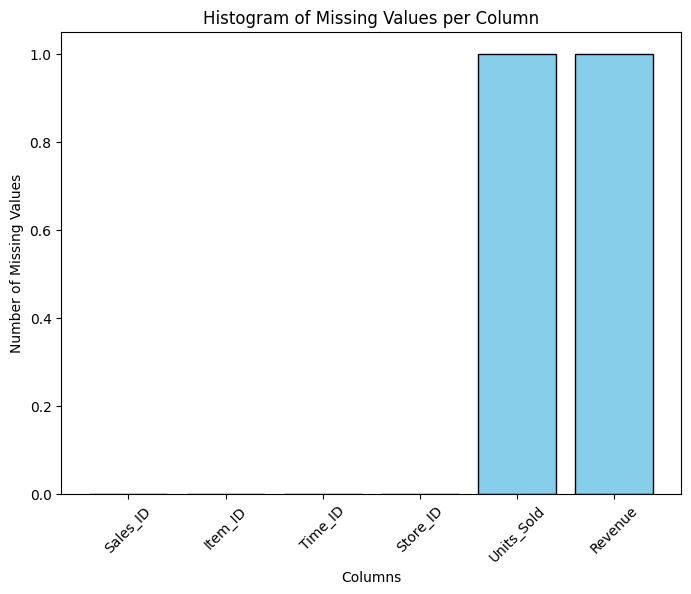

Sales Data after Dropping Missing Values:
    Sales_ID  Item_ID  Time_ID  Store_ID  Units_Sold   Revenue
0         1        1        1         1      1000.0  500000.0
Mean: 600.0, Median: 600.0, Mode: 200.0, Std Dev: 565.685424949238, Variance: 320000.0

Sales Data after Filling Missing Values with Mean:
    Sales_ID  Item_ID  Time_ID  Store_ID  Units_Sold   Revenue
0         1        1        1         1      1000.0  500000.0
1         2        2        2         2       200.0  400000.0
2         3        3        3         3       600.0  300000.0


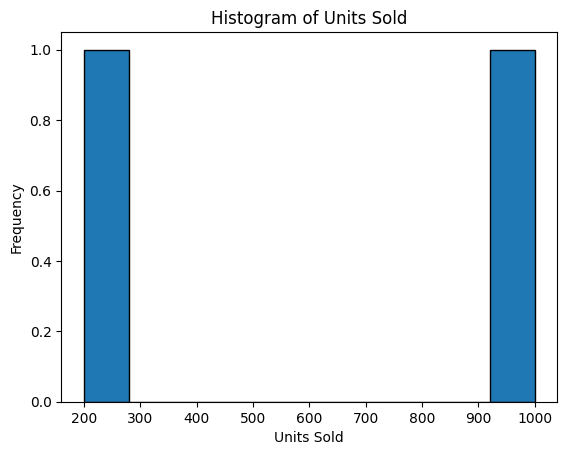


Sampled Data:
    Sales_ID  Item_ID  Time_ID  Store_ID  Units_Sold   Revenue
0         1        1        1         1      1000.0  500000.0
2         3        3        3         3         NaN  300000.0
Covariance Matrix:
             Units_Sold       Revenue
Units_Sold    320000.0           NaN
Revenue            NaN  2.000000e+10

Square Root Transformation:
    Units_Sold  Units_Sold_Sqrt
0      1000.0        31.622777
1       200.0        14.142136
2         NaN        24.494897

Cube Root Transformation:
    Units_Sold  Units_Sold_CubeRoot
0      1000.0            10.000000
1       200.0             5.848035
2         NaN             8.434327

Log Transformation:
    Units_Sold  Units_Sold_Log
0      1000.0        6.908755
1       200.0        5.303305
2         NaN        6.398595

Min-Max Normalization:
    Units_Sold  Units_Sold_MinMax
0      1000.0                1.0
1       200.0                0.0
2         NaN                0.5

Z-Score Normalization:
    Units_Sold  Units_

In [16]:
#EXPERIMENT 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating dataframes with missing values
item_data = {
    'Item_ID': [1, 2, 3],
    'Item_Name': ['FootBall', 'Knife', 'Tablet'],
    'Category': ['Sports', 'Electronics', 'Electronics'],
    'Brand': ['Kipsta', 'Pigeon', 'Sony']
}
item_df = pd.DataFrame(item_data)

time_data = {
    'Time_ID': [1, 2, 3],
    'Date': pd.date_range(start='2023-01-01', periods=3, freq='D'),
    'Month': ['January', 'January', 'March'],
    'Quarter': ['Q1', 'Q1', 'Q3'],
    'Year': [2023, 2023, 2023]
}
time_df = pd.DataFrame(time_data)

store_data = {
    'Store_ID': [1, 2, 3],
    'Store_Name': ['Decathlon', 'Big Bazaar', 'Reliance Digital'],
    'Location': ['Banglore', 'Coimbatore', 'Hosur'],
    'Region': ['North', 'South', 'West']
}
store_df = pd.DataFrame(store_data)

sales_data = {
    'Sales_ID': [1, 2, 3],
    'Item_ID': [1, 2, 3],
    'Time_ID': [1, 2, 3],
    'Store_ID': [1, 2, 3],
    'Units_Sold': [1000, 200, np.nan],  # Introducing a NaN value
    'Revenue': [500000, np.nan, 300000]  # Introducing a NaN value
}
sales_df = pd.DataFrame(sales_data)


print("Missing Values in Sales Data:\n", sales_df.isna().sum())

# Calculate the number of missing values per column
missing_values = sales_df.isna().sum()

# Draw a histogram for missing values
plt.figure(figsize=(8, 6))
plt.bar(missing_values.index, missing_values.values, color='skyblue', edgecolor='black')
plt.title('Histogram of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


# Dropping rows with any missing values
cleaned_sales_df = sales_df.dropna()
print("Sales Data after Dropping Missing Values:\n", cleaned_sales_df)


# Calculate statistics
mean_units_sold = sales_df['Units_Sold'].mean()
median_units_sold = sales_df['Units_Sold'].median()
mode_units_sold = sales_df['Units_Sold'].mode()[0]
std_units_sold = sales_df['Units_Sold'].std()
variance_units_sold = sales_df['Units_Sold'].var()

print(f"Mean: {mean_units_sold}, Median: {median_units_sold}, Mode: {mode_units_sold}, Std Dev: {std_units_sold}, Variance: {variance_units_sold}")

# Fill missing values with mean, median, and mode
sales_df_filled_mean = sales_df.fillna({'Units_Sold': mean_units_sold, 'Revenue': sales_df['Revenue'].mean()})
print("\nSales Data after Filling Missing Values with Mean:\n", sales_df_filled_mean)


# Histogram for Units Sold
plt.hist(sales_df['Units_Sold'].dropna(), bins=10, edgecolor='black')
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


# Random sampling of 2 rows
sampled_df = sales_df.sample(n=2, random_state=1)
print("\nSampled Data:\n", sampled_df)


# Compute covariance matrix
cov_matrix = sales_df[['Units_Sold', 'Revenue']].cov()
print("Covariance Matrix:\n", cov_matrix)


# Square root transformation
sales_df['Units_Sold_Sqrt'] = np.sqrt(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nSquare Root Transformation:\n", sales_df[['Units_Sold', 'Units_Sold_Sqrt']])


# Cube root transformation
sales_df['Units_Sold_CubeRoot'] = np.cbrt(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nCube Root Transformation:\n", sales_df[['Units_Sold', 'Units_Sold_CubeRoot']])


# Log transformation (adding a small constant to avoid log(0))
sales_df['Units_Sold_Log'] = np.log1p(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nLog Transformation:\n", sales_df[['Units_Sold', 'Units_Sold_Log']])


def min_max_normalization(series):
    return (series - series.min()) / (series.max() - series.min())

sales_df['Units_Sold_MinMax'] = min_max_normalization(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nMin-Max Normalization:\n", sales_df[['Units_Sold', 'Units_Sold_MinMax']])


def z_score_normalization(series):
    return (series - series.mean()) / series.std()

sales_df['Units_Sold_ZScore'] = z_score_normalization(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nZ-Score Normalization:\n", sales_df[['Units_Sold', 'Units_Sold_ZScore']])


def decimal_scaling_normalization(series):
    max_abs_value = series.abs().max()
    scale_factor = 10**np.ceil(np.log10(max_abs_value))
    return series / scale_factor


sales_df['Units_Sold_DecimalScaling'] = decimal_scaling_normalization(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nDecimal Scaling Normalization:\n", sales_df[['Units_Sold', 'Units_Sold_DecimalScaling']])

Missing Values in Sales Data:
 Sales_ID      0
Item_ID       0
Time_ID       0
Store_ID      0
Units_Sold    1
Revenue       1
dtype: int64
Mean: 600.0, Median: 600.0, Mode: 200.0, Std Dev: 565.685424949238, Variance: 320000.0


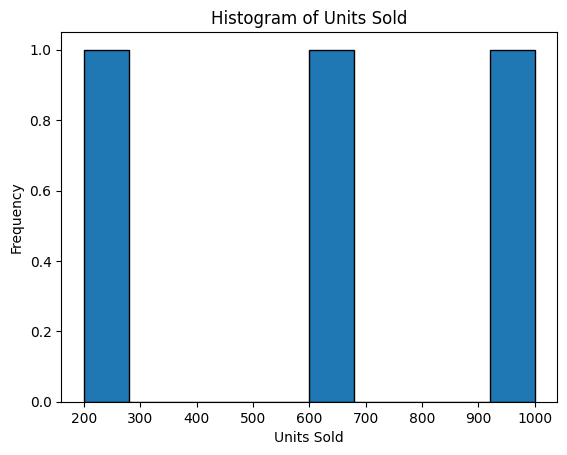


Covariance Matrix:
             Units_Sold       Revenue
Units_Sold    320000.0           NaN
Revenue            NaN  2.000000e+10

Square Root Transformation:
    Units_Sold  Units_Sold_Sqrt
0      1000.0        31.622777
1       200.0        14.142136
2         NaN        24.494897

Cube Root Transformation:
    Units_Sold  Units_Sold_CubeRoot
0      1000.0            10.000000
1       200.0             5.848035
2         NaN             8.434327

Min-Max Normalization:
    Units_Sold  Units_Sold_MinMax
0      1000.0                1.0
1       200.0                0.0
2       600.0                0.5

Z-Score Normalization:
    Units_Sold  Units_Sold_ZScore
0      1000.0                1.0
1       200.0               -1.0
2       600.0                0.0

Decimal Scaling Normalization:
    Units_Sold  Units_Sold_DecimalScaling
0      1000.0                        1.0
1       200.0                        0.2
2       600.0                        0.6


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating dataframes with missing values
item_data = {
    'Item_ID': [1, 2, 3],
    'Item_Name': ['FootBall', 'Knife', 'Tablet'],
    'Category': ['Sports', 'Electronics', 'Electronics'],
    'Brand': ['Kipsta', 'Pigeon', 'Sony']
}
item_df = pd.DataFrame(item_data)

time_data = {
    'Time_ID': [1, 2, 3],
    'Date': pd.date_range(start='2023-01-01', periods=3, freq='D'),
    'Month': ['January', 'January', 'March'],
    'Quarter': ['Q1', 'Q1', 'Q3'],
    'Year': [2023, 2023, 2023]
}
time_df = pd.DataFrame(time_data)

store_data = {
    'Store_ID': [1, 2, 3],
    'Store_Name': ['Decathlon', 'Big Bazaar', 'Reliance Digital'],
    'Location': ['Banglore', 'Coimbatore', 'Hosur'],
    'Region': ['North', 'South', 'West']
}
store_df = pd.DataFrame(store_data)

sales_data = {
    'Sales_ID': [1, 2, 3],
    'Item_ID': [1, 2, 3],
    'Time_ID': [1, 2, 3],
    'Store_ID': [1, 2, 3],
    'Units_Sold': [1000, 200, np.nan],  # Introducing a NaN value
    'Revenue': [500000, np.nan, 300000]  # Introducing a NaN value
}
sales_df = pd.DataFrame(sales_data)

print("Missing Values in Sales Data:\n", sales_df.isna().sum())


# Calculate statistics
mean_units_sold = sales_df['Units_Sold'].mean()
median_units_sold = sales_df['Units_Sold'].median()
mode_units_sold = sales_df['Units_Sold'].mode()[0]
std_units_sold = sales_df['Units_Sold'].std()
variance_units_sold = sales_df['Units_Sold'].var()

print(f"Mean: {mean_units_sold}, Median: {median_units_sold}, Mode: {mode_units_sold}, Std Dev: {std_units_sold}, Variance: {variance_units_sold}")

# Fill missing values with mean for the purpose of normalization
filled_sales_df = sales_df.fillna({'Units_Sold': mean_units_sold, 'Revenue': sales_df['Revenue'].mean()})

# Histogram for Units Sold
plt.hist(filled_sales_df['Units_Sold'].dropna(), bins=10, edgecolor='black')
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

# Compute covariance matrix
cov_matrix = sales_df[['Units_Sold', 'Revenue']].cov()
print("\nCovariance Matrix:\n", cov_matrix)


# Square root transformation
sales_df['Units_Sold_Sqrt'] = np.sqrt(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nSquare Root Transformation:\n", sales_df[['Units_Sold', 'Units_Sold_Sqrt']])


# Cube root transformation
sales_df['Units_Sold_CubeRoot'] = np.cbrt(sales_df['Units_Sold'].fillna(mean_units_sold))
print("\nCube Root Transformation:\n", sales_df[['Units_Sold', 'Units_Sold_CubeRoot']])

# Min-Max Normalization (handle NaN by filling before normalization)
def min_max_normalization(series):
    series = series.fillna(series.mean())  # Fill NaNs before normalization
    return (series - series.min()) / (series.max() - series.min())

filled_sales_df['Units_Sold_MinMax'] = min_max_normalization(filled_sales_df['Units_Sold'])
print("\nMin-Max Normalization:\n", filled_sales_df[['Units_Sold', 'Units_Sold_MinMax']])

# Z-Score Normalization (handle NaN by filling before normalization)
def z_score_normalization(series):
    series = series.fillna(series.mean())  # Fill NaNs before normalization
    return (series - series.mean()) / series.std()

filled_sales_df['Units_Sold_ZScore'] = z_score_normalization(filled_sales_df['Units_Sold'])
print("\nZ-Score Normalization:\n", filled_sales_df[['Units_Sold', 'Units_Sold_ZScore']])

# Decimal Scaling Normalization (handle NaN by filling before normalization)
def decimal_scaling_normalization(series):
    series = series.fillna(series.mean())  # Fill NaNs before normalization
    max_abs_value = series.abs().max()
    scale_factor = 10**np.ceil(np.log10(max_abs_value))
    return series / scale_factor

filled_sales_df['Units_Sold_DecimalScaling'] = decimal_scaling_normalization(filled_sales_df['Units_Sold'])
print("\nDecimal Scaling Normalization:\n", filled_sales_df[['Units_Sold', 'Units_Sold_DecimalScaling']])
